In [26]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np
import os

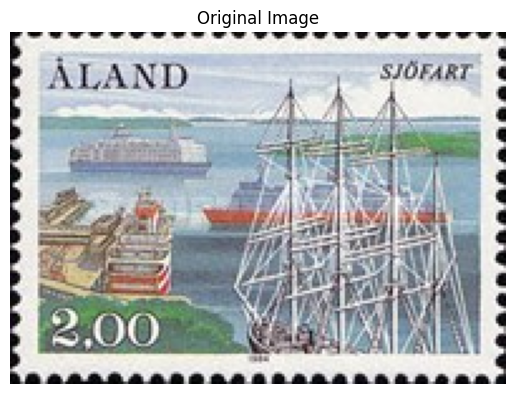

In [3]:
# Helper function to load and display an image
def show_image(image, title="Image"):
    # Convert BGR (OpenCV) to RGB for displaying
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(title)
    plt.show()

# Load your example image
img_path = "./images/original/Aaland/1984/8938/E-i.jpg"
image = cv2.imread(img_path)

if image is None:
    raise FileNotFoundError(f"Could not load image at {img_path}")

show_image(image, title="Original Image")

C:\Users\Robin\AppData\Local\Temp\ipykernel_34740\3394469860.py:8: UserWarning: Argument(s) 'value' are not valid for transform Rotate
  A.Rotate(limit=15, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.7),


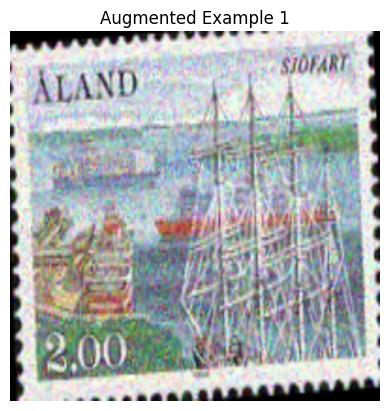

In [30]:
# Define a realistic augmentation pipeline
transform = A.Compose([
    A.RandomBrightnessContrast(p=0.7),
    A.HueSaturationValue(p=0.5),
    A.GaussianBlur(blur_limit=3, p=0.3),
    A.GaussNoise(std_range=(0.1, 0.2), p=0.5),
    A.MotionBlur(blur_limit=3, p=0.2),
    A.Rotate(limit=15, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.7),
    A.Perspective(scale=(0.02, 0.05), p=0.5),
    A.RandomShadow(p=0.3),
    A.RandomRain(blur_value=1, brightness_coefficient=0.9, p=0.2),
    A.Resize(512, 512)  # optional: resize for consistent display
])

# Apply and show some examples
for i in range(1):
    augmented = transform(image=image)["image"]
    show_image(augmented, title=f"Augmented Example {i+1}")

# Apply augmentation to one image

In [34]:
# Paths
img_path = "./images/original/Aaland/1984/8938/E-i.jpg"
save_dir = "./images/augmented/Aaland/1984/8938/"
os.makedirs(save_dir, exist_ok=True)

# Load original image
image = cv2.imread(img_path)
if image is None:
    raise FileNotFoundError(f"Could not load image at {img_path}")

# Augmentation pipeline
transform = A.Compose([
    A.RandomBrightnessContrast(p=0.7),
    A.HueSaturationValue(p=0.5),
    A.GaussianBlur(blur_limit=3, p=0.3),
    A.GaussNoise(std_range=(0.1, 0.2), p=0.5),
    A.MotionBlur(blur_limit=3, p=0.2),
    A.Rotate(limit=15, border_mode=cv2.BORDER_CONSTANT, p=0.7),
    A.Perspective(scale=(0.02, 0.05), p=0.5),
    A.RandomShadow(p=0.3),
    A.RandomRain(blur_value=1, brightness_coefficient=0.9, p=0.2),
    A.Resize(512, 512)
])

# Generate and save augmented images
n_augmentations = 20

for i in range(n_augmentations):
    augmented = transform(image=image)["image"]
    save_path = os.path.join(save_dir, f"E-i_augmented_{i+1:02d}.jpg")
    cv2.imwrite(save_path, augmented)
print(f"Saved all images")

Saved all images
